In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts


In [2]:
def outliers_window_modifier(dataframe, ticker, threshold, window):
    data = dataframe.copy()
    outlist = pd.DataFrame(columns = data.columns)
    replacement = pd.DataFrame(columns = data.columns)
    for i in range(5,window):
        mean_window = data[ticker][:i].mean()
        std_window = data[ticker][:i].std()
        z_score = (data[ticker][i] - mean_window)/std_window ##iii
        if np.abs(z_score) > threshold:
            data[ticker][i] = data[ticker][i-1]
            
    for j in range(window,len(data[ticker])):
        
        mean_window = data[ticker][j-window:j].mean()
        std_window = data[ticker][j-window:j].std()
        z_score = (data[ticker][j] - mean_window)/std_window #i
        if np.abs(z_score) > threshold:
            outlist = outlist.append(data.iloc[j], ignore_index=False)
            data[ticker][j] = data[ticker][j-1]
            replacement = outlist.append(data.iloc[j-1], ignore_index=False)
    return [data, outlist, replacement]

In [3]:
raw_data = pd.read_csv("Project_1.csv")

In [4]:
raw_data

,Date,Signal,Open,High,Low,Close,Adj Close
0,11/19/2015,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,11/20/2015,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,11/23/2015,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,11/24/2015,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,11/25/2015,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...,...
1033,12/30/2019,0.000000,165.979996,166.210007,164.570007,165.440002,163.623688
1034,12/31/2019,0.000000,165.080002,166.350006,164.710007,165.669998,163.851135
1035,1/2/2020,0.000000,166.740005,166.750000,164.229996,165.779999,163.959946
1036,1/3/2020,0.000000,163.740005,165.410004,163.699997,165.130005,163.317093


Text(0.5, 1.0, 'Signal')

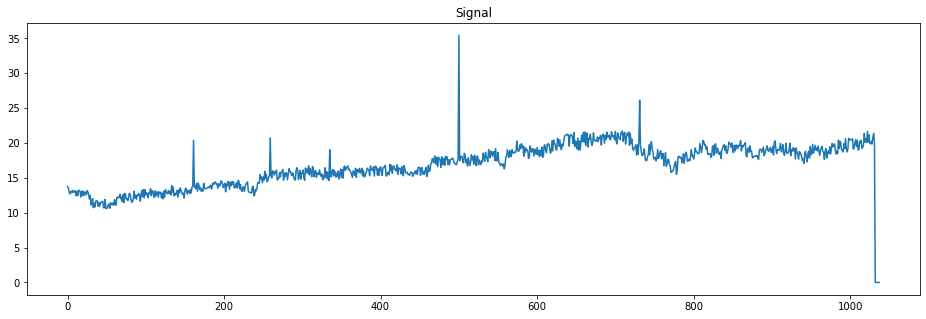

In [5]:
plt.figure(figsize = (16,5))
plt.plot(raw_data["Signal"])
plt.title("Signal")

Text(0.5, 1.0, 'Open')

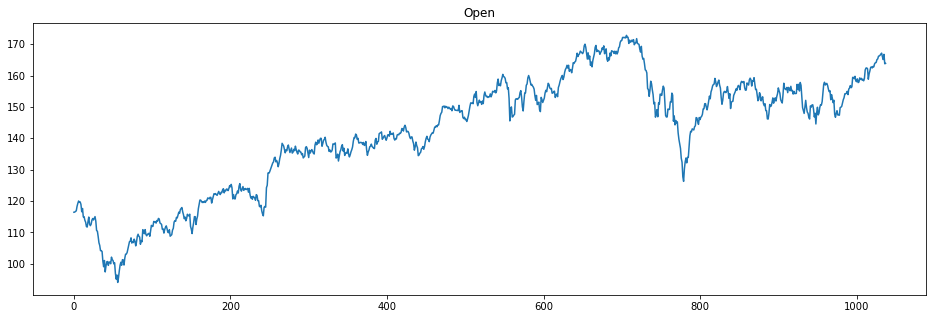

In [6]:
plt.figure(figsize = (16,5))
plt.plot(raw_data["Open"])
plt.title("Open")

Text(0.5, 1.0, 'High')

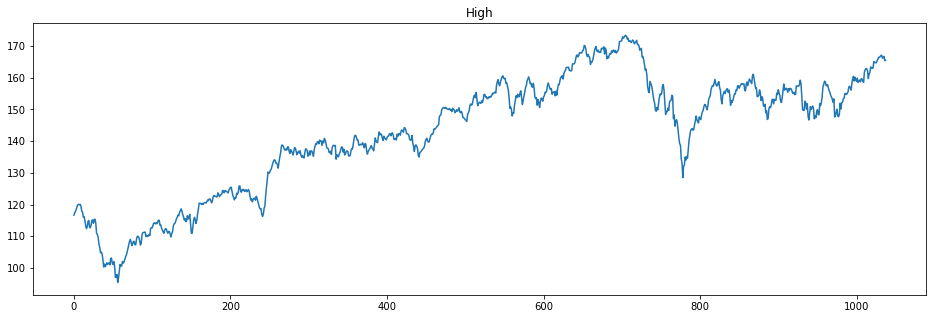

In [7]:
plt.figure(figsize = (16,5))
plt.plot(raw_data["High"])
plt.title("High")

Text(0.5, 1.0, 'Low')

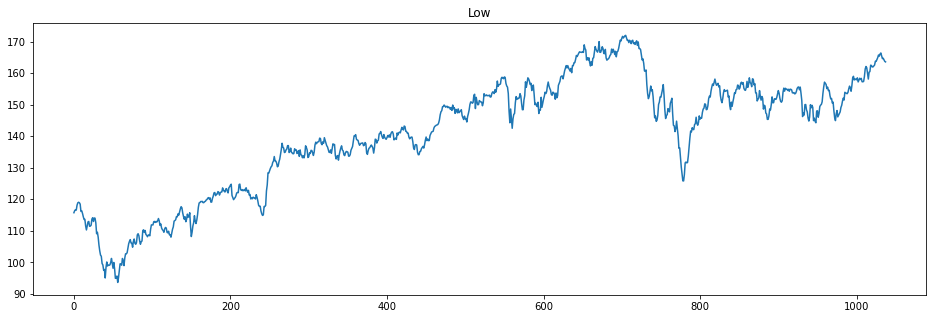

In [8]:
plt.figure(figsize = (16,5))
plt.plot(raw_data["Low"])
plt.title("Low")

Text(0.5, 1.0, 'Close')

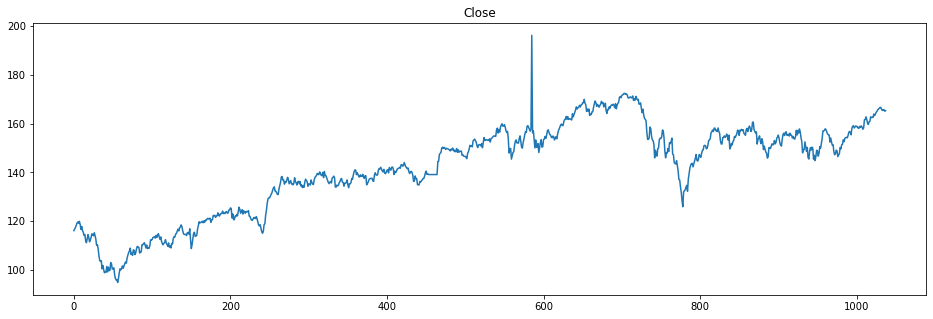

In [9]:
plt.figure(figsize = (16,5))
plt.plot(raw_data["Close"])
plt.title("Close")

Text(0.5, 1.0, 'Adj Close')

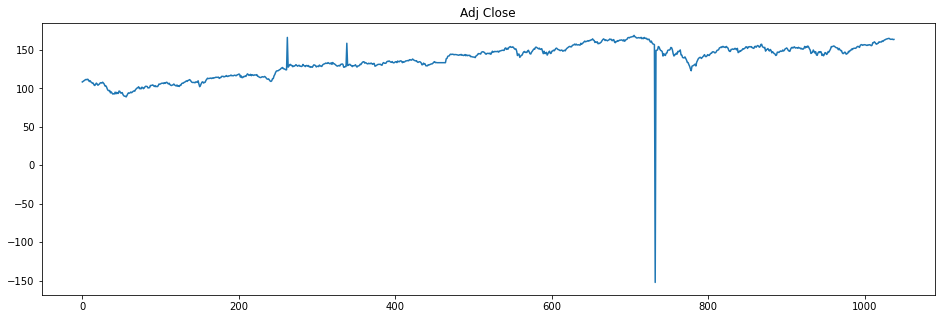

In [10]:
plt.figure(figsize = (16,5))
plt.plot(raw_data["Adj Close"])
plt.title("Adj Close")

Text(0.5, 1.0, 'Signal')

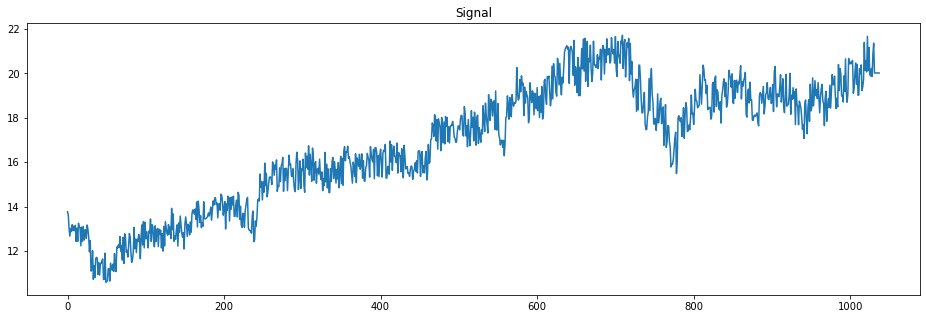

In [11]:
plt.figure(figsize = (16,5))
[data3, signal_outlier, signal_replacement] = outliers_window_modifier(raw_data, "Signal", 5, 20)
plt.plot(data3["Signal"])
plt.title("Signal")

In [12]:
data3

,Date,Signal,Open,High,Low,Close,Adj Close
0,11/19/2015,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,11/20/2015,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,11/23/2015,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,11/24/2015,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,11/25/2015,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...,...
1033,12/30/2019,20.016643,165.979996,166.210007,164.570007,165.440002,163.623688
1034,12/31/2019,20.016643,165.080002,166.350006,164.710007,165.669998,163.851135
1035,1/2/2020,20.016643,166.740005,166.750000,164.229996,165.779999,163.959946
1036,1/3/2020,20.016643,163.740005,165.410004,163.699997,165.130005,163.317093


In [13]:
signal_outlier

,Date,Signal,Open,High,Low,Close,Adj Close
161,7/13/2016,20.395083,120.330002,120.389999,118.949997,119.250000,112.691780
259,11/30/2016,20.738650,132.919998,133.089996,131.500000,131.610001,124.715752
335,3/22/2017,19.029316,133.710007,134.309998,132.779999,134.000000,127.504295
500,11/13/2017,35.434147,145.929993,146.820007,145.500000,146.610001,140.849274
731,10/9/2018,26.124873,161.619995,162.740005,160.979996,161.190002,156.781219
1032,12/27/2019,0.000000,167.119995,167.119995,165.429993,165.860001,164.039063
1033,12/30/2019,0.000000,165.979996,166.210007,164.570007,165.440002,163.623688
1034,12/31/2019,0.000000,165.080002,166.350006,164.710007,165.669998,163.851135
1035,1/2/2020,0.000000,166.740005,166.750000,164.229996,165.779999,163.959946
1036,1/3/2020,0.000000,163.740005,165.410004,163.699997,165.130005,163.317093


In [14]:
signal_replacement

,Date,Signal,Open,High,Low,Close,Adj Close
161,7/13/2016,20.395083,120.330002,120.389999,118.949997,119.250000,112.691780
259,11/30/2016,20.738650,132.919998,133.089996,131.500000,131.610001,124.715752
335,3/22/2017,19.029316,133.710007,134.309998,132.779999,134.000000,127.504295
500,11/13/2017,35.434147,145.929993,146.820007,145.500000,146.610001,140.849274
731,10/9/2018,26.124873,161.619995,162.740005,160.979996,161.190002,156.781219
1032,12/27/2019,0.000000,167.119995,167.119995,165.429993,165.860001,164.039063
1033,12/30/2019,0.000000,165.979996,166.210007,164.570007,165.440002,163.623688
1034,12/31/2019,0.000000,165.080002,166.350006,164.710007,165.669998,163.851135
1035,1/2/2020,0.000000,166.740005,166.750000,164.229996,165.779999,163.959946
1036,1/3/2020,0.000000,163.740005,165.410004,163.699997,165.130005,163.317093


Text(0.5, 1.0, 'Close')

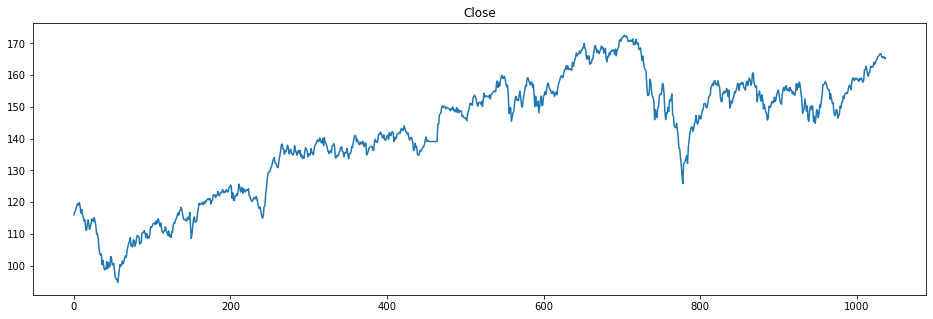

In [15]:
plt.figure(figsize = (16,5))
[data3, close_outlier, close_replacement] = outliers_window_modifier(data3, "Close", 7, 20)
plt.plot(data3["Close"])
plt.title("Close")

In [16]:
close_outlier

,Date,Signal,Open,High,Low,Close,Adj Close
585,3/19/2018,18.660897,157.169998,157.210007,154.449997,196.279999,150.708221


In [17]:
close_replacement

,Date,Signal,Open,High,Low,Close,Adj Close
585,3/19/2018,18.660897,157.169998,157.210007,154.449997,196.279999,150.708221
584,3/16/2018,19.385186,156.979996,158.270004,156.750000,157.800003,152.174042


Text(0.5, 1.0, 'Adj Close')

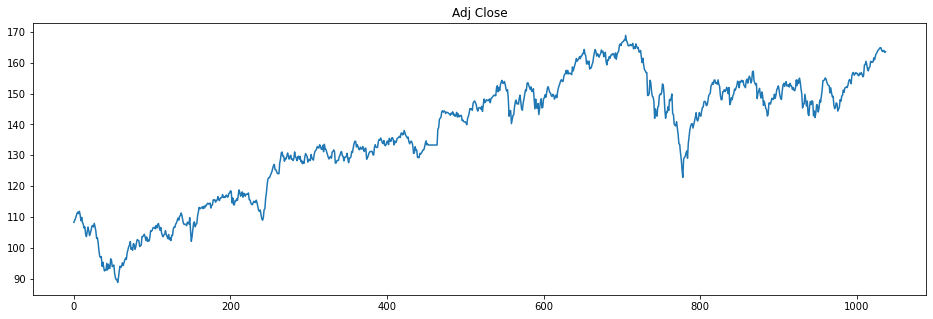

In [18]:
plt.figure(figsize = (16,5))
[data3, adj_close_outlier, adj_close_replacement] = outliers_window_modifier(data3, "Adj Close", 7, 20)
plt.plot(data3["Adj Close"])
plt.title("Adj Close")

In [19]:
adj_close_outlier

,Date,Signal,Open,High,Low,Close,Adj Close
262,12/5/2016,16.011011,131.970001,133.330002,131.889999,133.149994,166.175079
338,3/27/2017,16.032241,132.759995,135.070007,132.399994,134.740005,158.577637
732,10/10/2018,19.719477,160.820007,160.990005,156.360001,156.559998,-152.277847


In [20]:
adj_close_replacement

,Date,Signal,Open,High,Low,Close,Adj Close
262,12/5/2016,16.011011,131.970001,133.330002,131.889999,133.149994,166.175079
338,3/27/2017,16.032241,132.759995,135.070007,132.399994,134.740005,158.577637
732,10/10/2018,19.719477,160.820007,160.990005,156.360001,156.559998,-152.277847
731,10/9/2018,20.367731,161.619995,162.740005,160.979996,161.190002,156.781219


In [21]:
data3

,Date,Signal,Open,High,Low,Close,Adj Close
0,11/19/2015,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601
1,11/20/2015,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323
2,11/23/2015,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453
3,11/24/2015,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837
4,11/25/2015,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159
...,...,...,...,...,...,...,...
1033,12/30/2019,20.016643,165.979996,166.210007,164.570007,165.440002,163.623688
1034,12/31/2019,20.016643,165.080002,166.350006,164.710007,165.669998,163.851135
1035,1/2/2020,20.016643,166.740005,166.750000,164.229996,165.779999,163.959946
1036,1/3/2020,20.016643,163.740005,165.410004,163.699997,165.130005,163.317093


In [22]:
data3["Log Signal"] = np.log(data3["Signal"] / data3["Signal"].shift(1))
data3["Log Close"] = np.log(data3["Close"] / data3["Close"].shift(1))
data3["Log Adj Close"] = np.log(data3["Adj Close"] / data3["Adj Close"].shift(1))

In [23]:
corr_matrix = data3[["Signal","Close","Adj Close"]].corr()
corr_matrix

,Signal,Close,Adj Close
Signal,1.000000,0.958261,0.964855
Close,0.958261,1.000000,0.998006
Adj Close,0.964855,0.998006,1.000000


In [24]:
corr_matrix = data3[["Log Signal","Log Close","Log Adj Close"]].corr()
corr_matrix

,Log Signal,Log Close,Log Adj Close
Log Signal,1.000000,0.001980,0.001732
Log Close,0.001980,1.000000,0.986661
Log Adj Close,0.001732,0.986661,1.000000


In [25]:
signal_min = data3["Signal"].min()
signal_max = data3["Signal"].max()

close_min = data3["Close"].min()
close_max = data3["Close"].max()

adjclose_min = data3["Adj Close"].min()
adjclose_max = data3["Adj Close"].max()

In [26]:
data3["Standarded Signal"] = (data3["Signal"]-data3["Signal"].min())/(data3["Signal"].max()-data3["Signal"].min())
data3["Standarded Close"] = (data3["Close"]-data3["Close"].min())/(data3["Close"].max()-data3["Close"].min())
data3["Standarded Adj Close"] = (data3["Adj Close"]-data3["Adj Close"].min())/(data3["Adj Close"].max()-data3["Adj Close"].min())

In [27]:
data3["Diff Signal"] = data3["Signal"]-data3["Signal"].shift(1)
data3["Diff Close"] = data3["Close"]-data3["Close"].shift(1)
data3["Diff Adj Close"] = data3["Adj Close"]-data3["Adj Close"].shift(1)

In [28]:
data3

,Date,Signal,Open,High,Low,Close,Adj Close,Log Signal,Log Close,Log Adj Close,Standarded Signal,Standarded Close,Standarded Adj Close,Diff Signal,Diff Close,Diff Adj Close
0,11/19/2015,13.768540,116.440002,116.650002,115.739998,116.059998,108.281601,NaN,NaN,NaN,0.286235,0.273710,0.243193,NaN,NaN,NaN
1,11/20/2015,13.608819,116.480003,117.360001,116.379997,116.809998,108.981323,-0.011668,0.006441,0.006441,0.271883,0.283361,0.251938,-0.159721,0.750000,0.699722
2,11/23/2015,12.990589,116.709999,117.889999,116.680000,117.389999,109.522453,-0.046493,0.004953,0.004953,0.216333,0.290825,0.258700,-0.618230,0.580001,0.541130
3,11/24/2015,12.667435,116.879997,118.419998,116.559998,118.250000,110.324837,-0.025191,0.007299,0.007299,0.187296,0.301892,0.268727,-0.323154,0.860001,0.802384
4,11/25/2015,13.019910,118.300003,119.320000,118.110001,119.169998,111.183159,0.027445,0.007750,0.007750,0.218967,0.313731,0.279453,0.352475,0.919998,0.858322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,12/30/2019,20.016643,165.979996,166.210007,164.570007,165.440002,163.623688,0.000000,-0.002535,-0.002535,0.847654,0.909149,0.934785,0.000000,-0.419999,-0.415375
1034,12/31/2019,20.016643,165.080002,166.350006,164.710007,165.669998,163.851135,0.000000,0.001389,0.001389,0.847654,0.912109,0.937627,0.000000,0.229996,0.227447
1035,1/2/2020,20.016643,166.740005,166.750000,164.229996,165.779999,163.959946,0.000000,0.000664,0.000664,0.847654,0.913525,0.938987,0.000000,0.110001,0.108811
1036,1/3/2020,20.016643,163.740005,165.410004,163.699997,165.130005,163.317093,0.000000,-0.003929,-0.003928,0.847654,0.905160,0.930954,0.000000,-0.649994,-0.642853


In [29]:
corr_matrix = data3[["Standarded Signal","Standarded Close","Standarded Adj Close"]].corr()
corr_matrix

,Standarded Signal,Standarded Close,Standarded Adj Close
Standarded Signal,1.000000,0.958261,0.964855
Standarded Close,0.958261,1.000000,0.998006
Standarded Adj Close,0.964855,0.998006,1.000000


The correlation coeffecient matrix implies that there's a high correlation between Signal and Close and Adj Close.

In [30]:
corr_matrix = data3[["Diff Signal","Diff Close","Diff Adj Close"]].corr()
corr_matrix

,Diff Signal,Diff Close,Diff Adj Close
Diff Signal,1.000000,0.007046,0.008414
Diff Close,0.007046,1.000000,0.983267
Diff Adj Close,0.008414,0.983267,1.000000


In [31]:
signal1 = sm.add_constant(data3.Signal)
model1 = sm.OLS(data3.Close,signal1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.164e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:52:25   Log-Likelihood:                -3197.1
No. Observations:                1038   AIC:                             6398.
Df Residuals:                    1036   BIC:                             6408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8310      1.014     33.360      0.0

In [32]:
print(ts.adfuller(model1.resid))

(-3.504707644941444, 0.007867011684589498, 20, 1017, {'1%': -3.4367962951894597, '5%': -2.8643861179328973, '10%': -2.5682854002411317}, 5825.735706015411)


In [33]:
print(ts.coint(data3.Signal,data3.Close))

(-3.517530631307374, 0.03087265853613203, array([-3.90703232, -3.34202844, -3.0485424 ]))


In [34]:
a = pd.DataFrame(ts.coint(data3.Signal,data3.Close)).T
a.columns = ["cointegration result","p-value"," "]
a

,cointegration result,p-value,
0,-3.517531,0.030873,"[-3.907032315103002, -3.34202843737359, -3.048..."


In [35]:
data3 = data3.dropna()

In [36]:
signal2 = sm.add_constant(data3["Log Signal"])
model2 = sm.OLS(data3["Log Close"],signal2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              Log Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004057
Date:                Tue, 21 Jun 2022   Prob (F-statistic):              0.949
Time:                        18:52:25   Log-Likelihood:                 3272.0
No. Observations:                1037   AIC:                            -6540.
Df Residuals:                    1035   BIC:                            -6530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.064      0.2

In [37]:
print(ts.adfuller(model2.resid))

(-32.133315036196855, 0.0, 0, 1036, {'1%': -3.436677776748241, '5%': -2.8643338457318848, '10%': -2.5682575592567196}, -6398.311363039213)


In [38]:
print(ts.coint(data3["Log Signal"],data3["Log Close"]))

(-18.96578070796556, 0.0, array([-3.90704257, -3.34203414, -3.04854636]))


In [39]:
a = pd.DataFrame(ts.coint(data3["Log Signal"],data3["Log Close"])).T
a.columns = ["cointegration result","p-value"," "]
a

,cointegration result,p-value,
0,-18.965781,0.0,"[-3.907042569468255, -3.3420341369761926, -3.0..."


In [40]:
data3 = data3.dropna()

In [41]:
signal3 = sm.add_constant(data3["Diff Signal"])
model3 = sm.OLS(data3["Diff Close"],signal3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             Diff Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05139
Date:                Tue, 21 Jun 2022   Prob (F-statistic):              0.821
Time:                        18:52:26   Log-Likelihood:                -1838.8
No. Observations:                1037   AIC:                             3682.
Df Residuals:                    1035   BIC:                             3692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0475      0.044      1.071      

In [42]:
print(ts.adfuller(model3.resid))

(-32.31509280168959, 0.0, 0, 1036, {'1%': -3.436677776748241, '5%': -2.8643338457318848, '10%': -2.5682575592567196}, 3604.8042467403775)


In [43]:
print(ts.coint(data3["Diff Signal"],data3["Diff Close"]))

(-15.849251174370714, 7.484488366356427e-28, array([-3.90704257, -3.34203414, -3.04854636]))
